In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from netaddr import IPNetwork, IPAddress

In [2]:
df = pd.read_csv("all-traffic.csv")

In [3]:
proto_counts = df['Protocol'].value_counts()
print(proto_counts)

UDP         3598
TCP          643
SIP          596
HTTP         122
STUN          44
DTLSv1.2      19
Name: Protocol, dtype: int64


In [4]:
IPs = list(df['Source'].unique())
IPs.sort()
IPs = list(map(IPAddress, IPs))
UE_IPs = [ip for ip in IPs if ip in IPNetwork('192.168.20.0/24')]


In [5]:
new_df = pd.DataFrame(columns=['Time','UE-App','Length'])

for i, row in df.iterrows():
    
    
    if '192.168.3.101' in row['Source'] or '192.168.3.101' in row['Destination']:
        app = 'web-rtc'
    
    if '192.168.3.102' in row['Source'] or '192.168.3.102' in row['Destination']:
        app = 'sipp'
        
    if '192.168.3.103' in row['Source'] or '192.168.3.103' in row['Destination']:
        app = 'web-server'
        
    if  str(UE_IPs[0]) in row['Source'] or str(UE_IPs[0]) in row['Destination']:
        ue = '1'
        
    if str(UE_IPs[1]) in row['Source'] or str(UE_IPs[1]) in row['Destination']:
        ue = '2'
        
    if str(UE_IPs[2]) in row['Source'] or str(UE_IPs[2]) in row['Destination']:
        ue = '3'
       
    data = {'Time': [row['Time']], 'UE-App':["UE"+str(ue) + ": " + app], 'Length':[row['Length']]}
    temp_df = pd.DataFrame.from_dict(data)
    
    
    new_df = new_df.append(temp_df, ignore_index=True)

In [6]:
new_df

,Time,UE-App,Length
0,31.530196,UE1: web-rtc,74
1,31.530218,UE1: web-rtc,74
2,31.530228,UE1: web-rtc,74
3,31.530238,UE1: web-rtc,74
4,31.530248,UE1: web-rtc,74
...,...,...,...
5017,51.162078,UE1: web-rtc,66
5018,52.106807,UE1: web-rtc,66
5019,52.161047,UE1: web-rtc,66
5020,55.992120,UE1: web-rtc,66


(array([100., 324., 628., 798., 836., 752., 784., 790.,   8.,   2.]),
 array([31.530196 , 33.9764081, 36.4226202, 38.8688323, 41.3150444,
        43.7612565, 46.2074686, 48.6536807, 51.0998928, 53.5461049,
        55.992317 ]),
 <BarContainer object of 10 artists>)

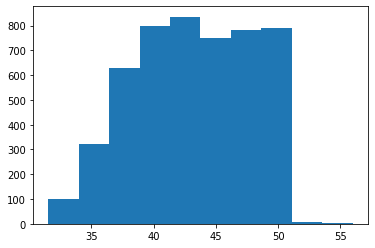

In [8]:
plt.hist(new_df['Time'])

In [9]:
count_values = dict(new_df.groupby('UE-App')['Length'].sum())
count_values

{'UE1: web-rtc': 3856242, 'UE2: sipp': 226540, 'UE3: web-server': 96965}

In [10]:
Combos = list(new_df['UE-App'].unique())

Combos

['UE1: web-rtc', 'UE2: sipp', 'UE3: web-server']

In [11]:
Ue_App_Len = { }
Ue_App_Len['UE1'] = {}
Ue_App_Len['UE1']['web-rtc'] = []
Ue_App_Len['UE1']['sipp'] = []
Ue_App_Len['UE1']['web-server'] = []
Ue_App_Len['UE2'] = {}
Ue_App_Len['UE2']['web-rtc'] = []
Ue_App_Len['UE2']['sipp'] = []
Ue_App_Len['UE2']['web-server'] = []
Ue_App_Len['UE3'] = {}
Ue_App_Len['UE3']['web-rtc'] = []
Ue_App_Len['UE3']['sipp'] = []
Ue_App_Len['UE3']['web-server'] = []

length_sum = dict(new_df.groupby('UE-App')['Length'].sum())
total_combs = list(new_df['UE-App'].unique())


for key, value in Ue_App_Len.items():
    for i in list(Ue_App_Len[key].keys()):
        comb = str(key) + ": " + str(i)
        if comb in total_combs:
            Ue_App_Len[key][str(i)].append(length_sum[comb])
        else:
            Ue_App_Len[key][str(i)].append(0)
            
            
Ue_App_Len



{'UE1': {'web-rtc': [3856242], 'sipp': [0], 'web-server': [0]},
 'UE2': {'web-rtc': [0], 'sipp': [226540], 'web-server': [0]},
 'UE3': {'web-rtc': [0], 'sipp': [0], 'web-server': [96965]}}

In [12]:
temp = { }
temp['UE1'] = {}
temp['UE1']['web-rtc'] = 20
temp['UE1']['sipp'] = 200
temp['UE1']['web-server'] = 100
temp['UE2'] = {}
temp['UE2']['web-rtc'] = 50
temp['UE2']['sipp'] = 60
temp['UE2']['web-server'] = 100
temp['UE3'] = {}
temp['UE3']['web-rtc'] = 2
temp['UE3']['sipp'] = 0
temp['UE3']['web-server'] = 200

Ue_App = { }
Ue_App['UE1'] = {}
Ue_App['UE1']['web-rtc'] = []
Ue_App['UE1']['sipp'] = []
Ue_App['UE1']['web-server'] = []
Ue_App['UE2'] = {}
Ue_App['UE2']['web-rtc'] = []
Ue_App['UE2']['sipp'] = []
Ue_App['UE2']['web-server'] = []
Ue_App['UE3'] = {}
Ue_App['UE3']['web-rtc'] = []
Ue_App['UE3']['sipp'] = []
Ue_App['UE3']['web-server'] = []


for (k,v), (k2,v2) in zip(Ue_App.items(), temp.items()):
    if k == k2:
        for i in list(temp[key].keys()):
            if temp[k][i]!= -1:
                Ue_App[k][i].append(temp[k][i])
            else:
                print("Problem with dictionary init")
        
Ue_App   


# for key, value in temp.items():
#     for i in list(temp[key].keys()):
#         comb = str(key) + ": " + str(i)
#         if comb in total_combs:
#             temp[key][str(i)] = length_sum[comb]
#         else:
#             temp[key][str(i)] = 0

    
    



{'UE1': {'web-rtc': [20], 'sipp': [200], 'web-server': [100]},
 'UE2': {'web-rtc': [50], 'sipp': [60], 'web-server': [100]},
 'UE3': {'web-rtc': [2], 'sipp': [0], 'web-server': [200]}}

In [13]:
temp

{'UE1': {'web-rtc': 20, 'sipp': 200, 'web-server': 100},
 'UE2': {'web-rtc': 50, 'sipp': 60, 'web-server': 100},
 'UE3': {'web-rtc': 2, 'sipp': 0, 'web-server': 200}}

  # Based on the sum of lengths of packets in a window

In [37]:
def find_window(df, index_start, window_duration=1, pred_window_duration=0.3):
    temp = { }
    temp['UE1'] = {}
    temp['UE1']['web-rtc'] = -1
    temp['UE1']['sipp'] = -1
    temp['UE1']['web-server'] = -1
    temp['UE2'] = {}
    temp['UE2']['web-rtc'] = -1
    temp['UE2']['sipp'] = -1
    temp['UE2']['web-server'] = -1
    temp['UE3'] = {}
    temp['UE3']['web-rtc'] = -1
    temp['UE3']['sipp'] = -1
    temp['UE3']['web-server'] = -1
    for i, row in df.iloc[index_start:,:].iterrows():
        if i == index_start:
            time_start = row['Time']
            
        time_end = row['Time']
        
        # check elapsed time
        if time_end - time_start >= window_duration:
            index_end = i
            
            # crop window
            window = new_df.iloc[index_start:index_end+1,:]
            length_sum = dict(window.groupby('UE-App')['Length'].sum())
            window_combs = list(window['UE-App'].unique())


            for key, value in temp.items():
                for j in list(temp[key].keys()):
                    comb = str(key) + ": " + str(j)
                    if comb in window_combs:
                        temp[key][str(j)] = length_sum[comb]
                    else:
                        temp[key][str(j)] = 0
            
            # calculate y
            y_temp,y_reach_end = find_pred_window(df, index_end+1, pred_window_duration)
            
            break

    return temp, y_temp, y_reach_end

In [33]:
new_df.iloc[-1,:]['Time']

55.99231700000001

In [34]:
def find_pred_window(df, index_start, window_duration=0.3):
    temp = { }
    temp['UE1'] = {}
    temp['UE1']['web-rtc'] = -1
    temp['UE1']['sipp'] = -1
    temp['UE1']['web-server'] = -1
    temp['UE2'] = {}
    temp['UE2']['web-rtc'] = -1
    temp['UE2']['sipp'] = -1
    temp['UE2']['web-server'] = -1
    temp['UE3'] = {}
    temp['UE3']['web-rtc'] = -1
    temp['UE3']['sipp'] = -1
    temp['UE3']['web-server'] = -1
    
    reach_end = 0
    for i, row in df.iloc[index_start:,:].iterrows():
        if i == index_start:
            time_start = row['Time']
            
        time_end = row['Time']
        
        # check elapsed time
        if time_end - time_start >= window_duration or time_end==new_df.iloc[-1,:]['Time']:
            index_end = i
            
            if time_end==new_df.iloc[-1,:]['Time']:
                reach_end=1
            # crop window
            window = new_df.iloc[index_start:index_end+1,:]
            length_sum = dict(window.groupby('UE-App')['Length'].sum())
            window_combs = list(window['UE-App'].unique())


            for key, value in temp.items():
                for j in list(temp[key].keys()):
                    comb = str(key) + ": " + str(j)
                    if comb in window_combs:
                        temp[key][str(j)] = length_sum[comb]
                    else:
                        temp[key][str(j)] = 0
            
            break

    return temp, reach_end

In [ ]:
Ue_App_Len = window_crop_new(new_df, offset = 1000, next_start_duration=next_s, window_duration=win_d)

        plt.figure()
        plt.plot(Ue_App_Len["UE1"]["web-rtc"],color='orange')
        plt.plot(Ue_App_Len["UE2"]["sipp"], color ='blue')
        plt.plot(Ue_App_Len["UE3"]["web-server"], color='green')
        plt.show()

In [15]:
find_window(new_df, 0, 24.461)



{'UE1': {'web-rtc': 3856176, 'sipp': 0, 'web-server': 0},
 'UE2': {'web-rtc': 0, 'sipp': 226540, 'web-server': 0},
 'UE3': {'web-rtc': 0, 'sipp': 0, 'web-server': 96965}}

In [16]:
count_values

{'UE1: web-rtc': 3856242, 'UE2: sipp': 226540, 'UE3: web-server': 96965}

In [39]:
def window_crop_new(new_df, offset = 0, next_start_duration=20 ,window_duration=1, pred_window_duration=0.3):
    '''Finds the beggining indexes for each window'''
    X_dict = { }
    X_dict['UE1'] = {}
    X_dict['UE1']['web-rtc'] = []
    X_dict['UE1']['sipp'] = []
    X_dict['UE1']['web-server'] = []
    X_dict['UE2'] = {}
    X_dict['UE2']['web-rtc'] = []
    X_dict['UE2']['sipp'] = []
    X_dict['UE2']['web-server'] = []
    X_dict['UE3'] = {}
    X_dict['UE3']['web-rtc'] = []
    X_dict['UE3']['sipp'] = []
    X_dict['UE3']['web-server'] = []
    
    y_dict = { }
    y_dict['UE1'] = {}
    y_dict['UE1']['web-rtc'] = []
    y_dict['UE1']['sipp'] = []
    y_dict['UE1']['web-server'] = []
    y_dict['UE2'] = {}
    y_dict['UE2']['web-rtc'] = []
    y_dict['UE2']['sipp'] = []
    y_dict['UE2']['web-server'] = []
    y_dict['UE3'] = {}
    y_dict['UE3']['web-rtc'] = []
    y_dict['UE3']['sipp'] = []
    y_dict['UE3']['web-server'] = []
    
    time_start = -1 
    for i, row in new_df.iloc[offset:,:].iterrows():

        if time_start == -1:
            time_start = row['Time']
            index_start = i
            
            # find window 1
            temp,y_temp,y_reach_end = find_window(new_df, index_start, window_duration=window_duration,pred_window_duration=pred_window_duration)
            
            # X dict process
            for (k,v), (k2,v2) in zip(X_dict.items(), temp.items()):
                if k == k2:
                    for j in list(temp[k].keys()):
                        if temp[k][j]!= -1:
                            X_dict[k][j].append(temp[k][j])
                            
            # y dict process
            for (k,v), (k2,v2) in zip(y_dict.items(), y_temp.items()):
                if k == k2:
                    for j in list(y_temp[k].keys()):
                        if y_temp[k][j]!= -1:
                            y_dict[k][j].append(y_temp[k][j])
                            
            if y_reach_end == 1:
                break
            
        time_end = row['Time']

        # check elapsed time
        if time_end - time_start >= next_start_duration:
            index_start = i
            time_start = -1
            
            # find window 2
            temp,y_temp,y_reach_end = find_window(new_df, index_start, window_duration=window_duration,pred_window_duration=pred_window_duration)
            
            # x dict process
            for (key1,value1), (key2,value2) in zip(X_dict.items(), temp.items()):
                if key1 == key2:
                    for m in list(temp[key1].keys()):
                        if temp[key1][m]!= -1:
                            X_dict[key1][m].append(temp[key1][m])
                            
            # y dict process
            for (k,v), (k2,v2) in zip(y_dict.items(), y_temp.items()):
                if k == k2:
                    for j in list(y_temp[k].keys()):
                        if y_temp[k][j]!= -1:
                            y_dict[k][j].append(y_temp[k][j])
                            
            if y_reach_end == 1:
                break
            
    return X_dict,y_dict

In [18]:
Ue_App_Len = window_crop_new(new_df, offset = 1000, next_start_duration=0.1, window_duration=0.3)

In [19]:
Ue_App_Len

{'UE1': {'web-rtc': [73931,
   74128,
   74119,
   73956,
   73956,
   74232,
   74246,
   75649,
   74476,
   75253,
   75366,
   75473,
   75470,
   75999,
   75975,
   63311,
   62116,
   61392,
   61367,
   56141,
   56268,
   72389,
   72376,
   72660,
   73877,
   80069,
   80092,
   69790,
   68612,
   70846,
   69650,
   71415,
   72562,
   82184,
   81001,
   74228,
   73047,
   47273,
   46104,
   39819,
   38742,
   53351,
   54508,
   85231,
   85323,
   86493,
   86493,
   88450,
   88463,
   74181,
   75332,
   64593,
   63435,
   48330,
   48340,
   65626,
   64475,
   71670,
   71670,
   52007,
   50826,
   38389,
   40773,
   56875,
   59229,
   93055,
   93055,
   95464,
   94305,
   96854,
   95723,
   94807,
   93612,
   80698,
   83060,
   71044,
   71037,
   74868,
   73721,
   87191,
   87079,
   65955,
   64770,
   43411,
   45759,
   57554,
   62178,
   96870,
   104017,
   103452,
   103452,
   95634,
   95542,
   95864,
   94670,
   96093,
   97253,
   92638,

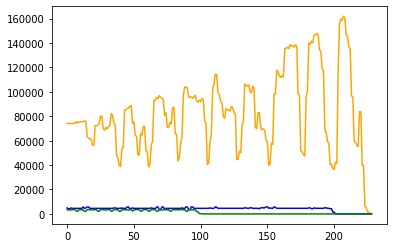

In [20]:
plt.plot(Ue_App_Len["UE1"]["web-rtc"],color='orange')
plt.plot(Ue_App_Len["UE2"]["sipp"], color ='blue')
plt.plot(Ue_App_Len["UE3"]["web-server"], color='green')

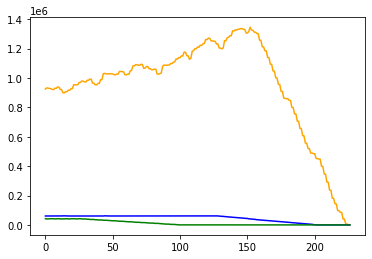

In [25]:
Ue_App_Len = window_crop_new(new_df, offset = 1000, next_start_duration=0.1, window_duration=4)

plt.figure()
plt.plot(Ue_App_Len["UE1"]["web-rtc"],color='orange')
plt.plot(Ue_App_Len["UE2"]["sipp"], color ='blue')
plt.plot(Ue_App_Len["UE3"]["web-server"], color='green')
plt.show()

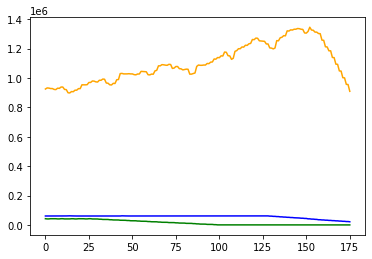

In [41]:
X_dict,y_dict = window_crop_new(new_df, offset = 1000, next_start_duration=0.1, window_duration=1)

plt.figure()
plt.plot(X_dict["UE1"]["web-rtc"],color='orange')
plt.plot(X_dict["UE2"]["sipp"], color ='blue')
plt.plot(X_dict["UE3"]["web-server"], color='green')
plt.show()

In [42]:
y_dict

{'UE1': {'web-rtc': [72365,
   75834,
   75834,
   87597,
   87597,
   76620,
   76620,
   43278,
   43278,
   44628,
   44649,
   72781,
   72781,
   104080,
   104080,
   104563,
   104563,
   94272,
   95394,
   95738,
   94544,
   97216,
   96042,
   91579,
   92967,
   91629,
   92662,
   85315,
   85315,
   64148,
   64148,
   41745,
   40547,
   65010,
   65010,
   102740,
   102740,
   111635,
   111635,
   113193,
   113193,
   91733,
   90542,
   85494,
   84211,
   83802,
   83802,
   83907,
   85113,
   91503,
   91503,
   84133,
   84133,
   50647,
   49450,
   50244,
   50244,
   75805,
   75805,
   106363,
   106363,
   104792,
   104792,
   100250,
   96808,
   102022,
   102022,
   70907,
   70907,
   93457,
   93457,
   67684,
   67684,
   70813,
   69568,
   55469,
   54286,
   45598,
   45598,
   44734,
   43747,
   63240,
   84313,
   124639,
   124639,
   111624,
   111684,
   111959,
   112055,
   126144,
   126144,
   134222,
   134222,
   133844,
   133844,
   

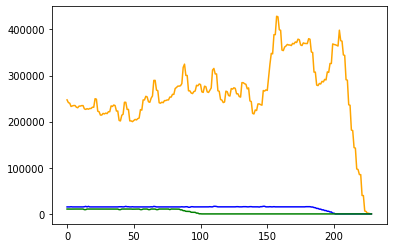

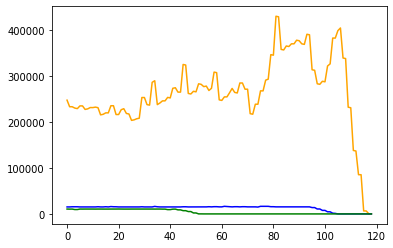

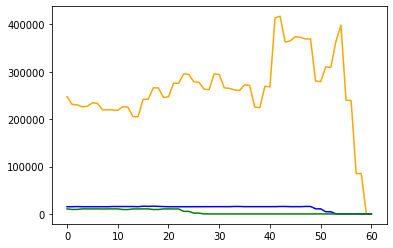

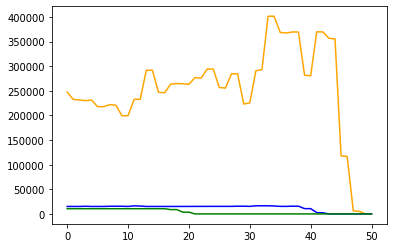

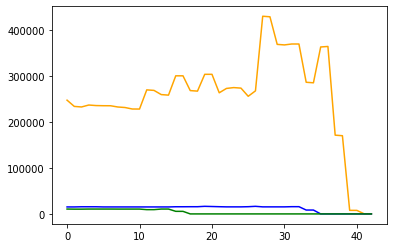

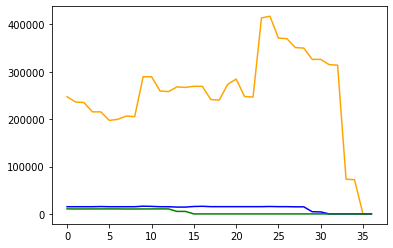

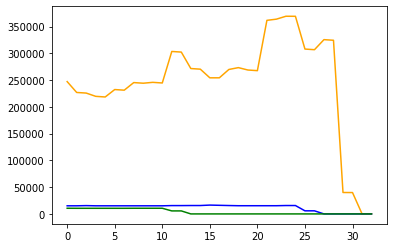

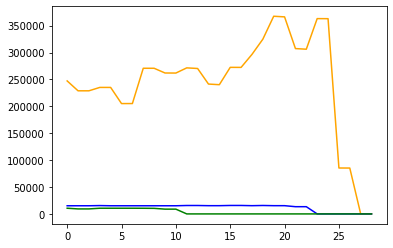

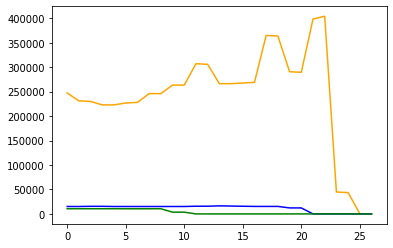

In [26]:
next_starts = [0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1]
win_durations = [1]
for next_s in next_starts:
    for win_d in win_durations:
        Ue_App_Len = window_crop_new(new_df, offset = 1000, next_start_duration=next_s, window_duration=win_d)

        plt.figure()
        plt.plot(Ue_App_Len["UE1"]["web-rtc"],color='orange')
        plt.plot(Ue_App_Len["UE2"]["sipp"], color ='blue')
        plt.plot(Ue_App_Len["UE3"]["web-server"], color='green')
        plt.show()

  # Based on sum of packets in a window

In [33]:

w = new_df.iloc[1000:1004,:]
window_combs = list(w['UE-App'].unique())
ok = dict(w['UE-App'].value_counts())
ok['UE1: web-rtc']

3

,Time,UE-App,Length
1000,38.734605,UE1: web-rtc,1172
1001,38.739726,UE1: web-rtc,1172
1002,38.741513,UE2: sipp,356
1003,38.744760,UE1: web-rtc,1172


In [46]:
def sum_packet_find_window(df, index_start, window_duration=1):
    temp = { }
    temp['UE1'] = {}
    temp['UE1']['web-rtc'] = -1
    temp['UE1']['sipp'] = -1
    temp['UE1']['web-server'] = -1
    temp['UE2'] = {}
    temp['UE2']['web-rtc'] = -1
    temp['UE2']['sipp'] = -1
    temp['UE2']['web-server'] = -1
    temp['UE3'] = {}
    temp['UE3']['web-rtc'] = -1
    temp['UE3']['sipp'] = -1
    temp['UE3']['web-server'] = -1
    for i, row in df.iloc[index_start:,:].iterrows():
        if i == index_start:
            time_start = row['Time']
            
        time_end = row['Time']
        
        # check elapsed time
        if time_end - time_start >= window_duration:
            index_end = i
            
            # crop window
            window = new_df.iloc[index_start:index_end+1,:]
            packets_sum = dict(window['UE-App'].value_counts())
            window_combs = list(window['UE-App'].unique())


            for key, value in temp.items():
                for j in list(temp[key].keys()):
                    comb = str(key) + ": " + str(j)
                    if comb in window_combs:
                        temp[key][str(j)] = packets_sum[comb]
                    else:
                        temp[key][str(j)] = 0
            
            break

    return temp

In [55]:
def window_crop_new_no_y(new_df, offset = 0, next_start_duration=20 ,window_duration=1):
    '''Finds the beggining indexes for each window'''
    Ue_App = { }
    Ue_App['UE1'] = {}
    Ue_App['UE1']['web-rtc'] = []
    Ue_App['UE1']['sipp'] = []
    Ue_App['UE1']['web-server'] = []
    Ue_App['UE2'] = {}
    Ue_App['UE2']['web-rtc'] = []
    Ue_App['UE2']['sipp'] = []
    Ue_App['UE2']['web-server'] = []
    Ue_App['UE3'] = {}
    Ue_App['UE3']['web-rtc'] = []
    Ue_App['UE3']['sipp'] = []
    Ue_App['UE3']['web-server'] = []
    
    
    time_start = -1 
    for i, row in new_df.iloc[offset:,:].iterrows():

        if time_start == -1:
            time_start = row['Time']
            index_start = i
            
            # find window 1
            temp = sum_packet_find_window(new_df, index_start, window_duration=window_duration)
            for (k,v), (k2,v2) in zip(Ue_App.items(), temp.items()):
                if k == k2:
                    for j in list(temp[k].keys()):
                        if temp[k][j]!= -1:
                            Ue_App[k][j].append(temp[k][j])
            
        time_end = row['Time']

        # check elapsed time
        if time_end - time_start >= next_start_duration:
            index_start = i
            time_start = -1
            
            # find window 2
            temp = sum_packet_find_window(new_df, index_start, window_duration=window_duration)
            for (key1,value1), (key2,value2) in zip(Ue_App.items(), temp.items()):
                if key1 == key2:
                    for m in list(temp[key1].keys()):
                        if temp[key1][m]!= -1:
                            Ue_App[key1][m].append(temp[key1][m])
                            
            
    return Ue_App

In [48]:
Ue_App = window_crop_new(new_df, offset = 1000, next_start_duration=0.1, window_duration=0.3)

In [49]:
Ue_App

{'UE1': {'web-rtc': [69,
   69,
   69,
   70,
   70,
   71,
   71,
   72,
   71,
   70,
   71,
   72,
   72,
   73,
   73,
   66,
   65,
   61,
   61,
   57,
   58,
   68,
   68,
   69,
   70,
   74,
   74,
   66,
   65,
   68,
   67,
   67,
   68,
   79,
   78,
   71,
   70,
   48,
   47,
   39,
   38,
   50,
   51,
   79,
   80,
   81,
   81,
   84,
   84,
   71,
   72,
   63,
   62,
   47,
   47,
   61,
   60,
   68,
   68,
   55,
   54,
   44,
   46,
   57,
   60,
   88,
   88,
   90,
   89,
   91,
   90,
   90,
   89,
   75,
   77,
   66,
   66,
   70,
   69,
   82,
   81,
   65,
   64,
   44,
   46,
   55,
   59,
   90,
   96,
   97,
   97,
   88,
   87,
   89,
   88,
   89,
   90,
   86,
   85,
   87,
   86,
   89,
   88,
   73,
   72,
   43,
   44,
   61,
   66,
   96,
   99,
   106,
   106,
   91,
   90,
   84,
   83,
   74,
   73,
   80,
   79,
   79,
   78,
   81,
   80,
   77,
   76,
   45,
   44,
   50,
   49,
   70,
   72,
   100,
   99,
   96,
   96,
   92,
   91,
   94,

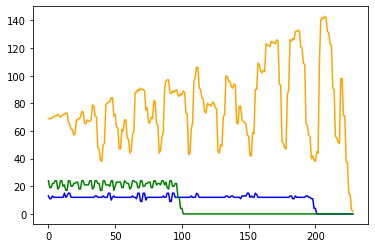

In [50]:
plt.plot(Ue_App["UE1"]["web-rtc"],color='orange')
plt.plot(Ue_App["UE2"]["sipp"], color ='blue')
plt.plot(Ue_App["UE3"]["web-server"], color='green')

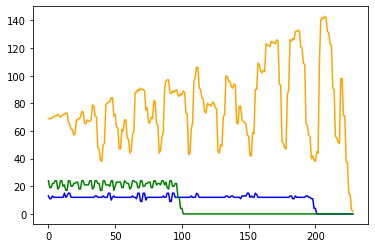

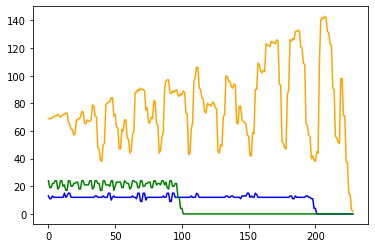

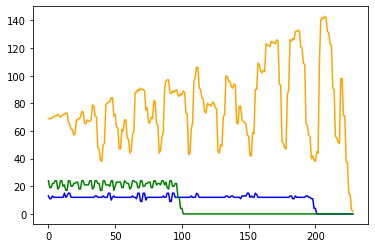

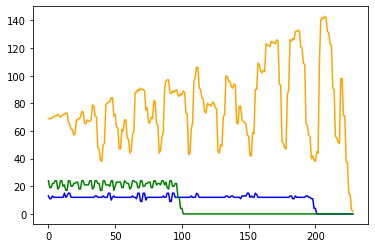

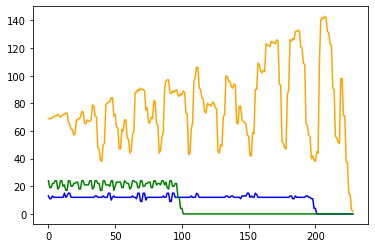

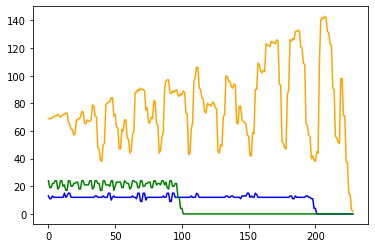

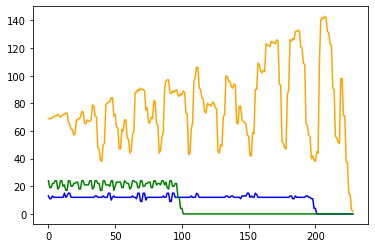

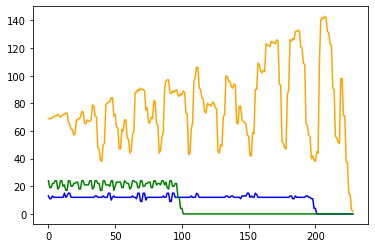

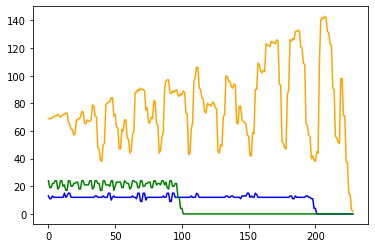

In [51]:
next_starts = [0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1]
win_durations = [1]
for next_s in next_starts:
    for win_d in win_durations:
        Ue_App_Len = window_crop_new(new_df, offset = 1000, next_start_duration=next_s, window_duration=win_d)

        plt.figure()
        plt.plot(Ue_App["UE1"]["web-rtc"],color='orange')
        plt.plot(Ue_App["UE2"]["sipp"], color ='blue')
        plt.plot(Ue_App["UE3"]["web-server"], color='green')
        plt.show()

# Time Sequence Aware

In [51]:
def obtain_window(df, n_packets=100):
    
    for i in range(df.shape[0]):
        window = df.iloc[i:i+n_packets,:]
        print(window.iloc[-1]['Time'] - window.iloc[0]['Time'])

In [52]:
obtain_window(new_df)

2.4218429999999955
2.6785819999999987
2.681045999999995
2.6831369999999986
2.693286000000004
2.7033619999999985
2.713137999999997
2.723148999999996
2.72316
2.7292029999999983
2.734348999999998
2.7394719999999957
2.723161999999995
2.719956
2.7700709999999944
2.7809339999999985
2.7860080000000025
2.791022999999999
2.3491950000000017
2.354030999999999
2.3533779999999993
2.358283
2.3495750000000015
2.3462809999999976
2.349695000000004
2.351354999999998
2.356311000000005
2.3613029999999924
2.3663900000000027
2.4111370000000036
2.471828000000002
2.560686000000004
2.553455999999997
2.6816829999999996
2.6992740000000026
2.6892979999999937
2.6815089999999913
2.7042099999999962
2.6881249999999994
2.6881270000000015
2.662446999999993
2.674825999999996
2.681681999999995
2.681638999999997
2.680272000000002
2.676142999999996
2.677762999999999
2.6213979999999992
2.6161620000000028
2.588405999999999
2.6037260000000018
2.582009999999997
2.5897579999999962
2.5680990000000037
2.58399
2.597639000000001
2.

0.5472570000000019
0.5424140000000008
0.5402379999999951
0.5350800000000007
0.5303009999999944
0.5286249999999981
0.5319939999999974
0.5329949999999997
0.5369329999999977
0.5340150000000037
0.5337630000000004
0.5287620000000004
0.5236970000000056
0.5216509999999985
0.5263119999999972
0.526477000000007
0.526721000000002
0.5293300000000087
0.5327419999999989
0.5340330000000009
0.5388030000000015
0.5387160000000009
0.5398410000000027
0.543602000000007
0.5462640000000007
0.5413320000000041
0.5368370000000056
0.536878999999999
0.537107000000006
0.5340840000000071
0.5299270000000007
0.5310679999999977
0.530974999999998
0.5105039999999974
0.5124229999999983
0.5113130000000012
0.4830300000000065
0.48808799999999763
0.4928120000000007
0.4965530000000058
0.501179999999998
0.4961020000000076
0.4914500000000004
0.48637500000000244
0.486452000000007
0.46986400000000117
0.48580899999999616
0.4879799999999932
0.4820789999999988
0.4919179999999983
0.4979849999999999
0.5018930000000026
0.50974799999999

0.28934699999999935
0.2874180000000024
0.2879129999999961
0.2881179999999972
0.2882030000000029
0.28999999999999915
0.29007800000000117
0.29007800000000117
0.2951659999999947
0.29257499999999936
0.2883819999999986
0.29012300000000835
0.2872869999999992
0.2878949999999989
0.29299600000000225
0.2978250000000031
0.29900200000000154
0.29517700000000247
0.2952280000000016
0.2918939999999992
0.29210200000000697
0.29091999999999985
0.2883720000000025
0.28818300000000363
0.284983000000004
0.28505799999999937
0.2851089999999985
0.28501500000000135
0.28327499999999617
0.28447699999999543
0.2895520000000005
0.28959299999999644
0.2854379999999992
0.28057799999999844
0.27596100000000234
0.2758980000000051
0.274911000000003
0.27296000000000475
0.2687480000000093
0.2638819999999953
0.25967799999999386
0.2596939999999961
0.25972699999999804
0.2597500000000039
0.25980500000000006
0.2620599999999982
0.2643409999999946
0.26643800000000084
0.2648679999999999
0.2699399999999983
0.26992100000000363
0.275004

0.3518369999999962
0.35200400000000087
0.3482040000000026
0.3470089999999999
0.3450610000000012
0.34473700000000207
0.3483110000000025
0.3530369999999934
0.35814699999999533
0.3580919999999992
0.3585599999999971
0.35999500000000495
0.35758599999999774
0.3525860000000023
0.34769500000000164
0.3465399999999974
0.34625700000000137
0.34624000000000166
0.3412190000000024
0.3436850000000007
0.3447970000000069
0.34075099999999736
0.34564799999999707
0.34989799999999605
0.35257500000000164
0.3498909999999995
0.3498909999999995
0.35104199999999963
0.35501899999999864
0.35698500000000166
0.36004700000000867
0.35499700000000445
0.35307800000000356
0.35500599999999594
0.36009200000000163
0.3603120000000004
0.3653929999999974
0.36515900000000556
0.3699179999999984
0.36513400000000473
0.36519499999999994
0.3650829999999985
0.3650840000000031
0.3651569999999893
0.36515399999999687
0.3670669999999987
0.3694109999999995
0.3693969999999993
0.36455499999999574
0.3600919999999945
0.35502299999999565
0.355

0.36014300000000077
0.3537759999999963
0.3237219999999965
0.3165380000000013
0.31602900000000034
0.31916000000000366
0.3012510000000006
0.29751300000000214
0.2908260000000027
0.2918080000000032
0.29640800000000667
0.29616399999999743
0.29599700000000695
0.3011279999999985
0.30610699999999724
0.28438800000000697
0.279960999999993
0.2801599999999951
0.281257999999994
0.26451499999999584
0.25516299999999603
0.25120700000000085
0.23748800000000614
0.2375070000000008
0.24223900000000498
0.23947600000000335
0.24443399999999826
0.24248099999999795
0.23746400000000278
0.23749699999999763
0.232479000000005
0.22912399999999877
0.22912499999999625
0.22917199999999838
0.22909099999999682
0.2290919999999943
0.22922599999998994
0.22484000000000037
0.22871800000000064
0.22439800000000076
0.22407300000000419
0.22751200000001148
0.22932300000000083
0.22657199999999733
0.22395600000000826
0.22395100000000667
0.22392999999999574
0.21929000000000087
0.21943899999999417
0.22071000000000396
0.22397600000000

0.32529399999999953
0.328009999999999
0.3253479999999982
0.32534599999999614
0.3253299999999939
0.3203359999999975
0.3253520000000023
0.3253750000000011
0.32543400000000133
0.32475900000000024
0.3198499999999953
0.3199499999999986
0.32026799999999866
0.31520399999999427
0.31789899999999705
0.33120300000000213
0.33121599999999773
0.3359540000000081
0.3153349999999975
0.320332999999998
0.31533700000000664
0.32033799999999246
0.32040500000000094
0.320411
0.3195789999999974
0.3177570000000003
0.3153700000000015
0.3153570000000059
0.3153440000000032
0.3203850000000017
0.3153569999999988
0.3136790000000005
0.3152279999999976
0.3384530000000012
0.3384499999999946
0.3383400000000023
0.35119000000000256
0.3820620000000048
0.39037400000000844
0.3993719999999996
0.41311599999999515
0.4011070000000032
0.3999459999999999
0.46200600000000236
0.46201900000000506
0.46668899999999525
0.43646500000000543
0.4415180000000092
0.43640700000000265
0.43745000000000545
0.4364259999999973
0.4364259999999973
0.4

0.2188420000000022
0.21884299999999968
0.21885000000000332
0.2188510000000008
0.21729200000000048
0.21886999999999546
0.213827000000002
0.2188639999999964
0.21814899999999682
0.21890599999999694
0.21890499999999946
0.21895699999999607
0.22408599999999979
0.22218700000000524
0.22404100000000682
0.22471399999999875
0.21958300000000008
0.21978500000000167
0.21889099999999928
0.2188860000000048
0.21909499999999582
0.21909899999999993
0.2190790000000007
0.21595200000000148
0.21885400000000033
0.2198360000000008
0.2196220000000011
0.22418400000000105
0.22419799999999412
0.22405600000000447
0.22405400000000242
0.2240409999999997
0.22403800000000018
0.2240640000000056
0.22406699999999802
0.22648399999999924
0.22415900000000022
0.22915900000000278
0.22410500000000155
0.2271469999999951
0.22413500000000397
0.22413499999999686
0.22415200000000368
0.22415300000000116
0.22415199999999658
0.2241509999999991
0.22415699999999816
0.22416499999999218
0.22418500000000563
0.22418400000000105
0.21994700000

0.20909700000000697
0.20916000000000423
0.2092710000000011
0.2090650000000025
0.21112100000000567
0.20917299999999983
0.21416200000000174
0.20912300000000528
0.2141419999999954
0.21415699999999305
0.21409100000000336
0.2140929999999983
0.20904500000000326
0.21412699999999774
0.20911399999999958
0.2141990000000078
0.20911399999999958
0.21416899999999828
0.21418200000000098
0.20904799999999568
0.21412600000000026
0.20913699999999835
0.20951499999999612
0.20919899999999814
0.20921200000000084
0.21427599999999103
0.20993299999999948
0.214217000000005
0.214221000000002
0.2091260000000048
0.21419699999999864
0.20921500000000037
0.21427500000000066
0.2092880000000008
0.21432800000000896
0.21434599999999904
0.20928699999999623
0.2142650000000046
0.2091750000000019
0.21429000000000542
0.20928899999999828
0.21432899999999933
0.20927799999999763
0.21363000000000198
0.20925499999999886
0.20925499999999886
0.20925499999999886
0.20926899999999904
0.20926899999999904
0.21104299999999654
0.20931900000

### Mini Windows

In [56]:
Ue_App = window_crop_new_no_y(new_df, offset = 1000, next_start_duration=1, window_duration=1)

plt.figure()
plt.plot(Ue_App["UE1"]["web-rtc"],color='orange')
plt.plot(Ue_App["UE2"]["sipp"], color ='blue')
plt.plot(Ue_App["UE3"]["web-server"], color='green')
plt.show()

NameError: name 'sum_packet_find_window' is not defined

In [60]:
def find_mini_window(df, index_start, window_duration=1):
    temp = { }
    temp['UE1'] = {}
    temp['UE1']['web-rtc'] = -1
    temp['UE1']['sipp'] = -1
    temp['UE1']['web-server'] = -1
    temp['UE2'] = {}
    temp['UE2']['web-rtc'] = -1
    temp['UE2']['sipp'] = -1
    temp['UE2']['web-server'] = -1
    temp['UE3'] = {}
    temp['UE3']['web-rtc'] = -1
    temp['UE3']['sipp'] = -1
    temp['UE3']['web-server'] = -1
    for i, row in df.iloc[index_start:,:].iterrows():
        if i == index_start:
            time_start = row['Time']
            
        time_end = row['Time']
        
        # check elapsed time
        if time_end - time_start >= window_duration:
            index_end = i
            
            # crop window
            window = new_df.iloc[index_start:index_end+1,:]
            length_sum = dict(window.groupby('UE-App')['Length'].sum())
            window_combs = list(window['UE-App'].unique())


            for key, value in temp.items():
                for j in list(temp[key].keys()):
                    comb = str(key) + ": " + str(j)
                    if comb in window_combs:
                        temp[key][str(j)] = length_sum[comb]
                    else:
                        temp[key][str(j)] = 0
            
            
            break

    return temp

In [67]:
def make_mini_windows(new_df, offset = 0, next_start_duration=20 ,window_duration=1):

    '''Finds the beggining indexes for each window'''
    X_dict = { }
    X_dict['UE1'] = {}
    X_dict['UE1']['web-rtc'] = []
    X_dict['UE1']['sipp'] = []
    X_dict['UE1']['web-server'] = []
    X_dict['UE2'] = {}
    X_dict['UE2']['web-rtc'] = []
    X_dict['UE2']['sipp'] = []
    X_dict['UE2']['web-server'] = []
    X_dict['UE3'] = {}
    X_dict['UE3']['web-rtc'] = []
    X_dict['UE3']['sipp'] = []
    X_dict['UE3']['web-server'] = []
    
    time_start = -1 
    for i, row in new_df.iloc[offset:,:].iterrows():

        if time_start == -1:
            time_start = row['Time']
            index_start = i
            
            # find window 1
            temp = find_mini_window(new_df, index_start, window_duration=window_duration)
            
            # X dict process
            for (k,v), (k2,v2) in zip(X_dict.items(), temp.items()):
                if k == k2:
                    for j in list(temp[k].keys()):
                        if temp[k][j]!= -1:
                            X_dict[k][j].append(temp[k][j])
                            
    
            
        time_end = row['Time']

        # check elapsed time
        if time_end - time_start >= next_start_duration:
            index_start = i
            time_start = -1
            
            # find window 2
            temp = find_mini_window(new_df, index_start, window_duration=window_duration)
            
            # x dict process
            for (key1,value1), (key2,value2) in zip(X_dict.items(), temp.items()):
                if key1 == key2:
                    for m in list(temp[key1].keys()):
                        if temp[key1][m]!= -1:
                            X_dict[key1][m].append(temp[key1][m])
                            
            
    return X_dict

In [7]:
def make_mini_windows2(new_df, offset = 0,duration=1):

    '''Finds the beggining indexes for each window'''
    X_dict = { }
    X_dict['UE1'] = {}
    X_dict['UE1']['web-rtc'] = []
    X_dict['UE1']['sipp'] = []
    X_dict['UE1']['web-server'] = []
    X_dict['UE2'] = {}
    X_dict['UE2']['web-rtc'] = []
    X_dict['UE2']['sipp'] = []
    X_dict['UE2']['web-server'] = []
    X_dict['UE3'] = {}
    X_dict['UE3']['web-rtc'] = []
    X_dict['UE3']['sipp'] = []
    X_dict['UE3']['web-server'] = []
    
    time_start = -1 
    for i, row in new_df.iloc[offset:,:].iterrows():

        if time_start == -1:
            time_start = row['Time']
            index_start = i

        time_end = row['Time']

        # check elapsed time
        if time_end - time_start >= duration:
            time_start = -1
            index_end = i

            # crop window
            window = new_df.iloc[index_start:index_end+1,:]
            
            length_sum = dict(window.groupby('UE-App')['Length'].sum())
            window_combs = list(window['UE-App'].unique())


            for key, value in X_dict.items():
                for j in list(X_dict[key].keys()):
                    comb = str(key) + ": " + str(j)
                    if comb in window_combs:
                        X_dict[key][str(j)].append(length_sum[comb])
                    else:
                        X_dict[key][str(j)].append(0)
            
                            
            
    return X_dict

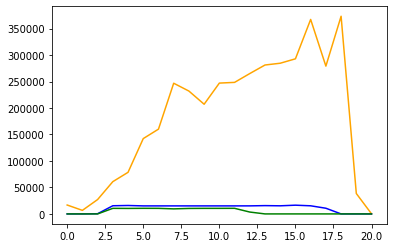

In [18]:
X_dict = make_mini_windows2(new_df, offset = 0, duration=1)
plt.figure()
plt.plot(X_dict["UE1"]["web-rtc"],color='orange')
plt.plot(X_dict["UE2"]["sipp"], color ='blue')
plt.plot(X_dict["UE3"]["web-server"], color='green')
plt.show()

In [86]:
new_df.iloc[-1,:]['Time'] - new_df.iloc[0,:]['Time']

24.462121000000003

In [87]:
len(X_dict["UE1"]["web-rtc"])

21

In [ ]:
def extract_x(X_dict, ):